<h5>CITS2402 Practical Assignment, Semester 2 2023</h5><br>

# Exploring Trends in Australian Census Data

---

## Declaration

This declaration should be completed and remain attached to the top of your submission.

*I/we am/are aware of the University’s [policy on academic conduct](https://www.uwa.edu.au/policy/-/media/Project/UWA/UWA/Policy-Library/Policy/Student-Administration/Academic-Integrity/Academic-Integrity-Policy.doc) and I declare that this assignment is entirely the work of the author(s) listed below and that suitable acknowledgement has been made for any sources of information used in preparing it. I have retained a copy for my own records.*

- Name 1: Jakem Pinchin
- Student ID 1: 22705919
- Date: 07/9/23



In [4]:
import csv
TABLE1 = "2011Census_B02_Medians.csv"

with open(TABLE1,'r') as file:
    prizes_list = file.readlines()
    print(*prizes_list)
with open(TABLE1, 'r') as csvfile:
    data = list(csv.reader(csvfile)) # a list of lists of strings
    #print(data)

region_id,Median_age_persons,Median_mortgage_repay_monthly,Median_Tot_prsnl_inc_weekly,Median_rent_weekly_,Median_Tot_fam_inc_weekly,Average_num_psns_per_bedroom,Median_Tot_hhd_inc_weekly,Average_household_size
 5,36,1950,662,300,1722,1.1,1415,2.6



Remove `_template` from your filename for submission.

<hr>


**Structure of this report** 

1. What is this report about, what question are we asking and its relevance
2. What categories might be relevant in asking this question
3. Data extraction/cleaning and its respective code
   1. Under each code segment will be an explanation of the cleaning process and the code, general thoughts and the like. Also references to which files the data is pooled and where to find it.
4. Data visualization
5. Thoughts on the data and conclusion in regards to the question



#### **Context**

Recently all we have been hearing about is that we are in a 'crisis' be it a housing or living, its all anyone is talking about. Frequent statements are thrown around using data that isn't well sourced and as such could be blatant lies or misrepresenting that data. "Housing is 10x more unaffordable now then it was 20 years ago" is something often heard in my generation, and as it is an extremely important for our futures here in Western Australia I was interested to finding out if this statement is true. So below I attempt to answer the question, has the median individual West Australian's income increased relative to housing affordability? And through that question decide as too whether the recent discussions on housing are true or false. Is our generation truly worse off? If social media is to be believed we definitely are...



## Question:

# Has the median individual West Australian's income increased relative to housing affordability?



##### Where does the data come from?

For this question we draw upon data from census years 1996 till 2021, giving us 25 year range of data. Census data can be found here through community profiles \([https://www.abs.gov.au/census/find\-census\-data/search\-by\-area?opendocument&navpos=230](https://www.abs.gov.au/census/find-census-data/search-by-area?opendocument&navpos=230)\) or through data packs \([https://www.abs.gov.au/census/find\-census\-data/datapacks](https://www.abs.gov.au/census/find-census-data/datapacks)\). Years 1996\-2006 don't have data packs and as such we need to rely on community profiles which are much harder to analyze. Specific data tables are

- From 1996
  - B32 SELECTED MEDIANS.csv
  - B30 WEEKLY HOUSEHOLD INCOME BY MONTHLY HOUSEHOLD LOAN REPAYMENT.csv
  - B30 WEEKLY HOUSEHOLD INCOME BY WEEKLY RENT.csv
- From 2001
  - B33 SELECTED AVERAGES.csv
  - B21 WEEKLY RENT BY LANDLORD TYPE.csv
- From 2006
  - B02 SELECTED MEDIANS AND AVERAGES.csv
- From 2011
  - 2011Census\_B02\_Medians.csv
- From 2016
  - 2016Census\_G02\_Medians.csv
- From 2021
  - 2021Census\_G02\_Medians.csv

##### What data do we need?

Some relevant data from these data packs and community profiles we draw upon are the median data for, housing mortgage repayments and rent costs \(show housing affordability\). Median data for individual income will help show if an individuals capacity to pay has rising in line with the housing costs. We only are drawing upon data from the Western Australian State and therefor only seeing how to affects West Australians.


In [5]:
# File names for relevant median data 2011-2021, shortened too Med(CensusYear)
Med2011 = "2011Census_B02_Medians.csv"
Med2016 = "2016Census_G02_Medians.csv"
Med2021 = "2021Census_G02_Medians.csv"

#Function that reads a median files from 2011 onwards and returns a list of lists of paired elements showing [catergory, value (In dollars $)]
def read_median_data(files):
    final_median_data = []
    
    # Open file and read relevant lines
    with open(files, 'r') as file:
        lines = file.readlines()
        header = lines[0].strip().split(',')
        data = lines[1].strip().split(',')
        median_data = []

        #Iterate through header list
        for index, category in enumerate(header):
            
            # Find relevant medians
            if category == "Median_mortgage_repay_monthly":
                
                # Converted to weekly rather then monthly repayment
                median_data.append(["Median_mortage_repay_weekly",((int(data[index]) * 12)// 365) *7]) 
                
            elif category.__contains__("prsnl") or category.__contains__("Median_rent_weekly"):
                median_data.append([header[index],int(data[index])])                
        final_median_data.extend(median_data)
        
    return final_median_data

# Test usage
read_median_data(Med2021)


[['Median_mortage_repay_weekly', 420],
 ['Median_tot_prsnl_inc_weekly', 848],
 ['Median_rent_weekly', 340]]

**Code Explanation**

In the above code, I created a function that reads the relevant files and extracts median data as a list of lists \(mortgage repayment, individual income, rent costs\) from census years 2011\-2021. Not much cleaning needed to be done as data packs are designed to be much easier to be analyzed by computers and as such common error found in earlier years, e.g. comma issues, empty list elements and the like wasn't present. 

**General Thoughts**

Census years 1996 \- 2006 are formatted differently from 2011\-2021, as such extracting the data is done differently for those years \(in the code later in this file\). Also 1996 median file only had individual income rather then all 3 categories, as such I extracted medians myself using files containing rent and mortgage cost data. I address the issues with different formatting from older files in the code below. As one can tell by the size difference in code needed, the older files are much harder to gain accurate and relevant data due to a variety of reasons mentioned later. The only issue with the above files were the ever so slightly different header names for the same categories, e.g. one letter not capitalized, as such I needed to use contains function rather then ==. Some integer values where also classified as string and need to be converted to int before arithmetic operators could be used also, this however is understandable as to why they used string rather then int.


In [6]:
# Function used to clean input string data, removing commas within quotes.
def clean_commas(data):
    inside_quotes = False
    finalstr = ""
    
    # Loops through each character in data
    for char in data:
        
        # Flips the true/false statement of inside_quotes, showing whether a char is inside a quote
        if char == '"':
            inside_quotes = not inside_quotes
            
        # If is inside quotes and character is a comma then skips adding to final string
        elif inside_quotes and char == ',':
            continue
            
        finalstr += char
        
    return finalstr

# Splitting the data into a list of only integers
def convert_int(finalstr):          
    data_list = finalstr.split(',')
    final_data_list = []
    for element in data_list[1:]:
        if element != '' and element != '\n':
            stripped_element = element.strip('"')
            final_data_list.append(int(stripped_element))
            
    return final_data_list

#Splitting the data into list without empty element or \n
def clean(finalstr):
    data_list = finalstr.split(',')
    final_data_list = []
    for element in data_list[1:]:
        if element != '' and element != '\n':
            stripped_element = element.strip('"')
            final_data_list.append(stripped_element)
            
    return final_data_list

#Function that grabs a range for medians and returns the mid point as an int. E.g. Range $600-$799 returns 699
def mid_point_median(median_range):
    median_repayment_list = median_range.split('-')
    for index, element in enumerate(median_repayment_list):
        median_repayment_list[index] = element.replace('$','')
        median_repayment_list[index] = int(median_repayment_list[index])

    median_repayment = (median_repayment_list[1] + median_repayment_list[0]) // 2
    return median_repayment   

**Code Explanation**

The above code is functions that will be used later on when extracting and cleaning the 1996\-2006 data files, this includes commonly used tasks like removing commas in quotes \(clean\_commas\), converting variables to integers from string while also removing some break line and quotes \(convert\_int\), spliting a string in a list then cleaning each element of that list removing blank elements and line breaks \(clean\) and finally, a function that returns the middle point of a median range e.g. 600\-799 returns 699 \(mid\_point\_median\). These functions are used frequently later and were separated from the code below to create a more sleek and easy to read code, otherwise the code would repeat and bulk it up.


In [7]:
# Function that returns a list of lists from the 1996 dataset in the same fashion as the 2011-2021 files
def Median1996():
    import re
    medians = []
    
    #Extracting and cleaning weekly mortgage loan repayment data
    with open("B30 WEEKLY HOUSEHOLD INCOME BY MONTHLY HOUSING LOAN REPAYMENT.csv") as file:
        lines = file.readlines()
        
        # Extracting relevant data/headings from all lines
        totals = lines[-5]
        headings = lines[7:9]
        categories = []

        # Clean heading lines
        for item in headings:
            clean_headings = clean(clean_commas(item))
            categories.append(clean_headings)
        
        # Removing Total and Not Stated as Headings and pairing two lines together to create complete headings
        categories[0] = categories[0][:-1]    
        categories[1] = categories[1][:-2]
        final_categories = [] 
        for index, element in enumerate(categories[0]):
            final_categories.append(categories[0][index] + categories[1][index])
        
        # Finding median data point in frequency table
        cleaned_data = convert_int(clean_commas(totals))
        median_number = (sum(cleaned_data[:-2]) + 1) // 2
        sums = 0
        for element in cleaned_data[:-2]:
            sums += element
            if sums > median_number:
                median = element
                break            
    
        # Finding the category that median pairs with
        index_median = cleaned_data.index(median)
        
        # Getting mid-point of range
        median_repayment = mid_point_median(final_categories[index_median])
        
        # Appending to final list
        medians.append(["Median_Weekly_Housing_Repayment",(((median_repayment*12)//365)*7)])

    # Extracting median personal income    
    with open("B32 SELECTED MEDIANS.csv") as file:
        lines = file.readlines()
        weekly_income = lines[6].split(',')
        medians.append([weekly_income[0],mid_point_median(weekly_income[1])])
    
    # Extracting and cleaning weekly rent costs
    with open("B31 WEEKLY HOUSEHOLD INCOME BY WEEKLY RENT.csv", 'r') as file:
        lines = file.readlines()
        
        #Extracting relevant data/headingds from all lines
        totals = lines[-4]
        headings = lines[7:9]
        categories = []
        sums = 0
        
        # Clean heading lines
        for item in headings:
            clean_headings = clean(clean_commas(item))
            categories.append(clean_headings)
        
        # Removing Total and Not Stated as Headings and pairing two lines together to create complete headings
        categories[0] = categories[0][:-1]    
        categories[1] = categories[1][:-2]
        final_categories = [] 
        for index, element in enumerate(categories[0]):
            final_categories.append(categories[0][index] + categories[1][index])
            
        # Finding median point in frequency point
        cleaned_data = convert_int(clean_commas(totals))
        median_number = (sum(cleaned_data[:-2]) + 1) // 2
        for element in cleaned_data[:-2]:
            sums += element
            if sums > median_number:
                median = element
                break
           
        # Finding the category that median pairs with
        index_median = cleaned_data.index(median)
                
        medians.append(["Median_Weekly_Rent",mid_point_median(final_categories[index_median])])        
        
    return(medians)


# Function that returns a list of lists of medians mortgage repayment, individual income, rent costs.
def Median2001():
    with open("B33 SELECTED AVERAGES 2001.csv") as file:
        lines = file.readlines()
        medians = []
        
        # Split relevant lines by commas
        mortgage = lines[7].split(',')
        rent = lines[8].split(',')
        income = lines[9].split(',')
        
        # Extract the mid point medians of each category and append to final list
        mortgage_median = mid_point_median(mortgage[1].replace('\n',''))
        mortgage_weekly = (((int(mortgage_median) * 12) //365) * 7)
        medians.append(["Median Weekly Housing Loan Repayment",mortgage_weekly])
        
        income_median = mid_point_median(income[1].replace('\n',''))
        medians.append([income[0],income_median])
        
        rent_median = mid_point_median(rent[1].replace('\n',''))
        medians.append([rent[0],rent_median])
        
        return medians

# Function to extract and clean the 2006 median data    
def Median2006():
    with open("B02 SELECTED MEDIANS & AVERAGES 2006.csv") as file:
        lines = file.readlines()
        medians = []
        
        # Extract and clean weekly mortgage data
        mortgage = clean_commas(lines[8]).split(',')[-2:]
        mortgage[1] = mortgage[1].replace('\n','')
        mortgage[1] = int(mortgage[1].replace('"',''))
        mortgage[1] = (((mortgage[1] * 12) //365) * 7)
        mortgage[0] = 'Median housing loan repayment ($/weekly)'

        #Extract and clean individual income data
        income = lines[10].split(',')[:2]
        income[1] = int(income[1])
        
        #Extract and clean rent cost data
        rent = lines[10].split(',')[-2:]
        rent[1] = rent[1].replace('\n','')
        rent[1] = int(rent[1])                    
        
        medians.append(mortgage)
        medians.append(income)
        medians.append(rent)
        
        return medians
    
med1996 = Median1996()    
med2001 = Median2001()
med2006 = Median2006()


**Code Explanation**

The above code, grabs relevant files to extract the median for weekly medians for mortgage, income and rent repayment for years 1996 to 2006. The above code cleans the data and deals with any problems with the files included. 

**General Thoughts**

1996 had the largest issues when extracting the data, this is mainly due to me having to personally extract the data and calculate the medians from their respective tables rather then using the selected averages and medians like other years, this cause me to run into a larger amount of errors unlike the other files. There were a variety of errors from 1996\-2006, mainly stemming from not having a standardized practice with data input, and in general bad data practice \(using commas in a comma separated table, etc.\).  Changes from each census year will also cause a potential misrepresentation of the data, for example 1996 to 2001 it appears that rent costs went down, but its possible it didn't, this is due to the range of groupings changing between the years. 1996 measured median ranges of 100 \(\$100\-\$199\) up till \(\$1000 or more\) while 2001 did groups of 50 \(\$100\-\$149\) up too \(\$500 or more\) as such the median when the output rent median for 1996 is \$149 and 2006 is \$124 it appears to have decrease but its possible that more people are just barely caught in the \$100\-\$199 group at the low end, while 2001 are caught in the \$100\-\$149 group but at the high end. I have kept both files in the directory so you can view at your pleasure. This is why its important to keep consistent data ranges throughout the census years, having smaller ranges is better for more accurate data however could create more categories. This group of code was by far the hardest part of the report, specifically cleaning and extracting 1996 data took 8\+ hours, list below is some reasons why it took so long and is a testament too why good data practice is so important.

**Some Issues Encountered**

- Using commas in the data when the data was comma separated \(bad practice\). 
  - This was the largest problem, there where instances where they would comma separate for thousands in the data, e.g. "1,000". Making it much harder to split the lines and create accurate data.
- Some number entered as integers and other strings.
  - This caused issues when dealing with arithmetic equations, \* // \+ \- and the like. As you cannot string \* int.
- Ranges for \$ totals where on two different lines and needed to be merged. 
  - Had to extract two separate lines and merge them which could have been avoided by simply having the headings on one line. E.g. \$100\-\$200 was actually \$100\- then \$200 on a separate line entire.
- Calculating the median in a frequency table. 
  - As they didn't contain a median ready for use like the more modern files, I had to calculate the median using frequency table calculations.
- Mortgage measured on a monthly timeframe rather then weekly like other variables 
  - Good practice to measure all values on the same time frame, yearly, monthly, weekly. This wasn't done.
  - I rounded down to floor division for calculating the weekly from monthly so housing repayment measurement slightly lower then its real / most accurate values.
- 2006 file had data paired on one line rather then separate and therefor needed to be split further then needed if inputted correctly



## Visualization

In this part of the report we will visualize the data the we extracted above and a bit more. Now what visualization is relevant, its unlikely bar or pie graph will be a good representation of the data above. Line graph will provide a much better visualization of the data as seen below. 


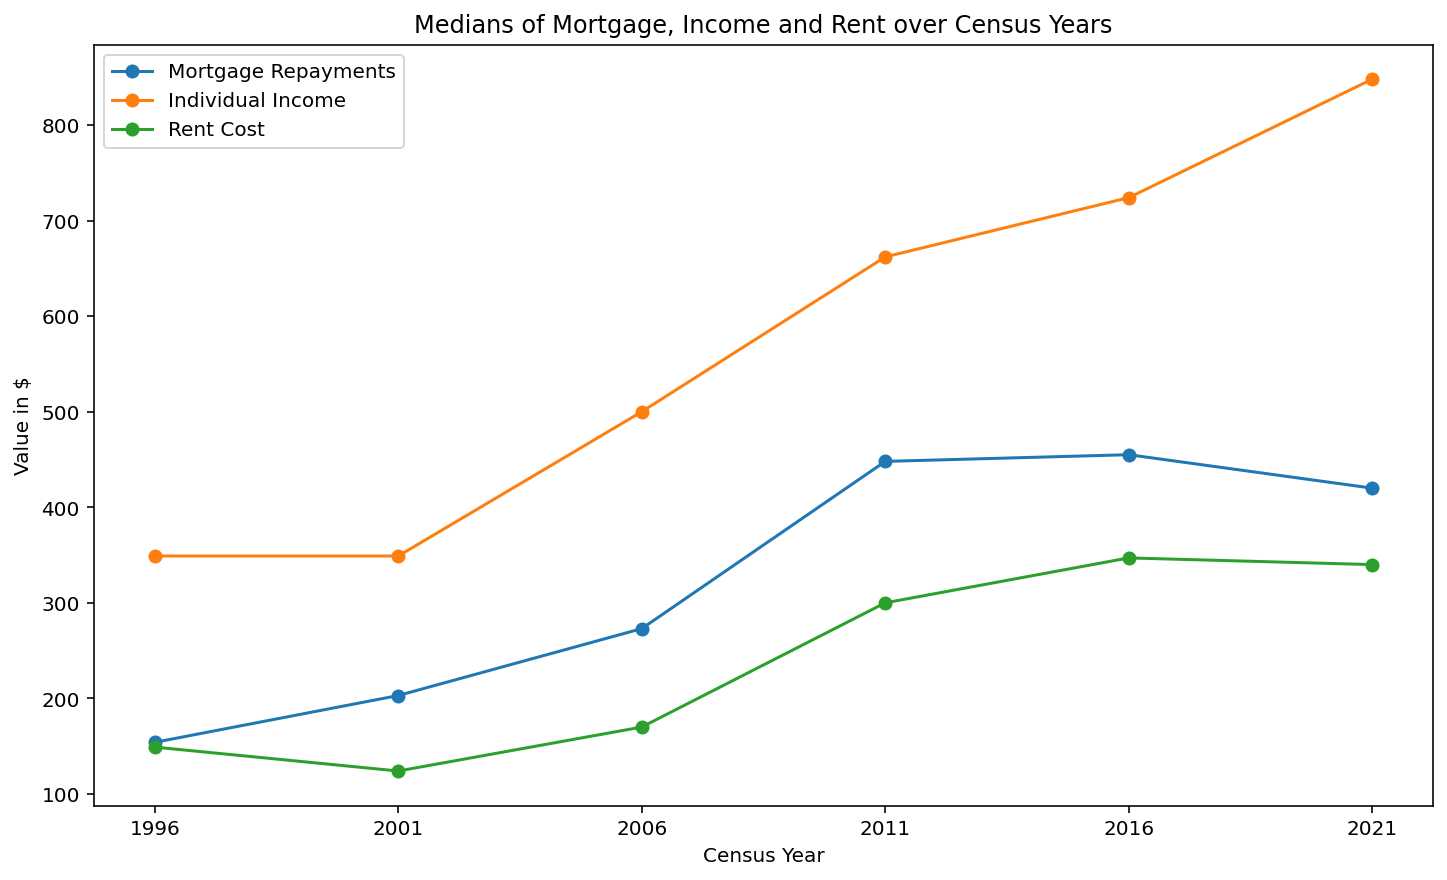

In [8]:
import matplotlib.pyplot as plt

mortgage_repayment = []
individual_income = []
rent_cost = []
years = ['1996','2001','2006','2011','2016','2021'] #Creating a list of census years

# Creating a list of only ordered mortgage repayments
mortgage_repayment.append(med1996[0][1])
mortgage_repayment.append(med2001[0][1])
mortgage_repayment.append(med2006[0][1])
mortgage_repayment.append(read_median_data(Med2011)[0][1])
mortgage_repayment.append(read_median_data(Med2016)[0][1])
mortgage_repayment.append(read_median_data(Med2021)[0][1])

# Creating a list of only ordered individual incomes
individual_income.append(med1996[1][1])
individual_income.append(med2001[1][1])
individual_income.append(med2006[1][1])
individual_income.append(read_median_data(Med2011)[1][1])
individual_income.append(read_median_data(Med2016)[1][1])
individual_income.append(read_median_data(Med2021)[1][1])

# Creating a list of only ordered rent costs
rent_cost.append(med1996[2][1])
rent_cost.append(med2001[2][1])
rent_cost.append(med2006[2][1])
rent_cost.append(read_median_data(Med2011)[2][1])
rent_cost.append(read_median_data(Med2016)[2][1])
rent_cost.append(read_median_data(Med2021)[2][1])

#plt.bar(years, mortgage_repayment)
#plt.pie(mortgage_repayment, labels = years)

# A line plot of the medians of the respective categories (mortgage,income,rent) over the census years
plt.plot(years, mortgage_repayment, marker='o', label = 'Mortgage Repayments')
plt.plot(years, individual_income, marker='o', label = 'Individual Income')
plt.plot(years, rent_cost, marker='o', label = 'Rent Cost')
plt.xlabel("Census Year")
plt.ylabel("Value in $")
plt.title("Medians of Mortgage, Income and Rent over Census Years")
plt.legend()
plt.show()



**What does the graph tell us?**

It shows that individual income is increasing proportionally more then the cost of housing \(both rent and mortgage\). The smallest gap \(and therefor the hardest time too afford\) housing seemed to be 2001. The biggest gap between income and the other categories is 2021 indicating that then was the easy time to afford a home. This graph at least in part answers the starting question, has the median individual West Australian's income increased relative to housing affordability? The answer seems to be incomed has increased more then housing costs. Lets graph this difference.



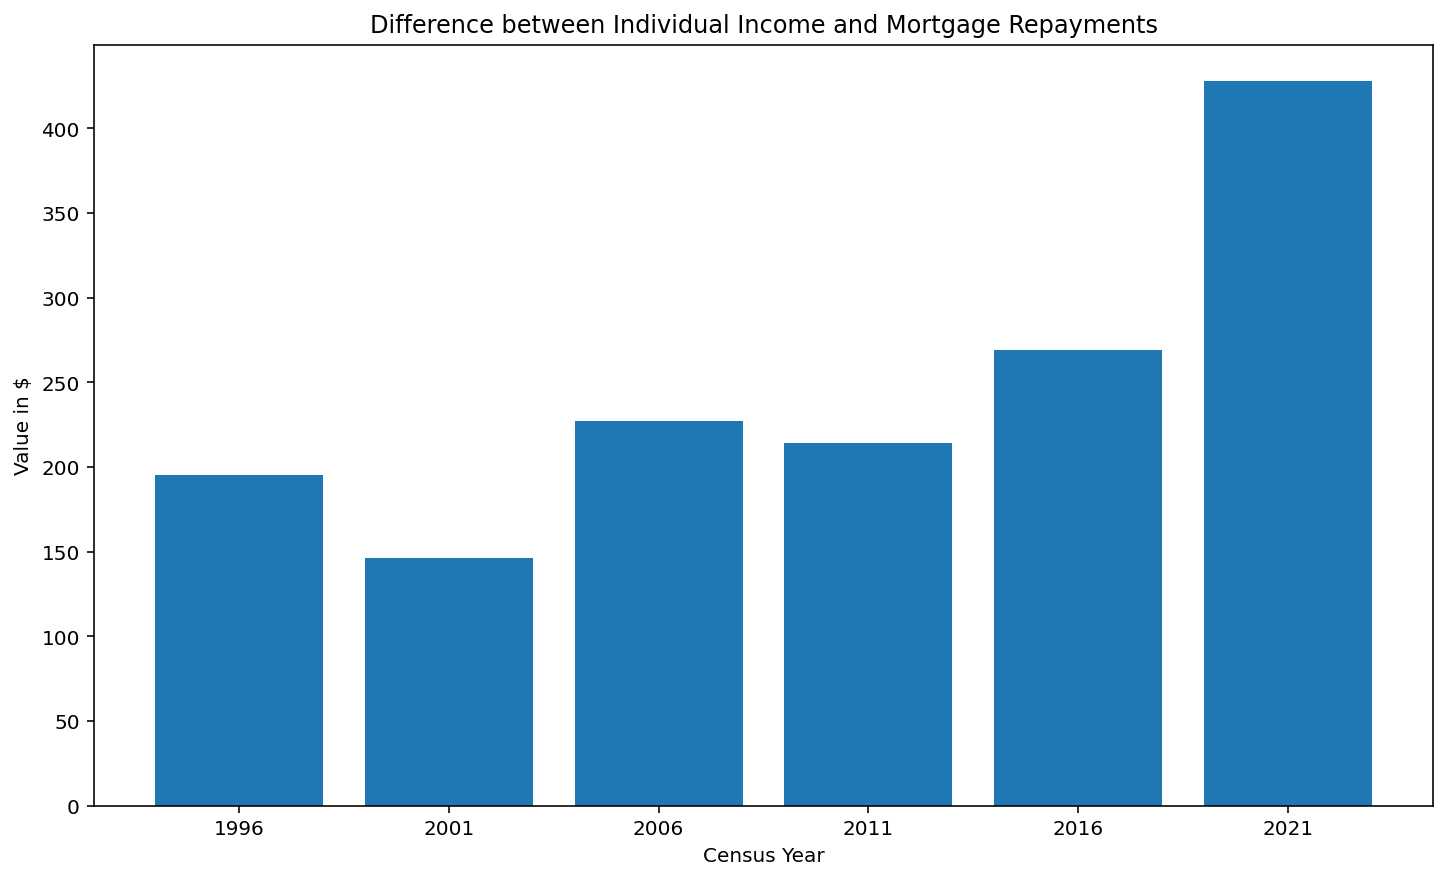

In [9]:
# Declaring new lists to hold the difference between each income and mortgage/rent
dif_income_mortgage = []
dif_income_rent = []

# Loop through each number for income and - the corresponding mortgage repayment year, add this number to corresponding list
for index, num in enumerate(individual_income):
    dif_income_mortgage.append(num - mortgage_repayment[index])
    
# Loop through each number for income and - the corresponding rent cost year, add this number to corresponding list
for index, num in enumerate(individual_income):
    dif_income_rent.append(num - rent_cost[index])
    
# Creating bar graph of differnce in income and mortgage    
plt.bar(years,dif_income_mortgage)
plt.xlabel("Census Year")
plt.ylabel("Value in $")
plt.title("Difference between Individual Income and Mortgage Repayments")
plt.show()

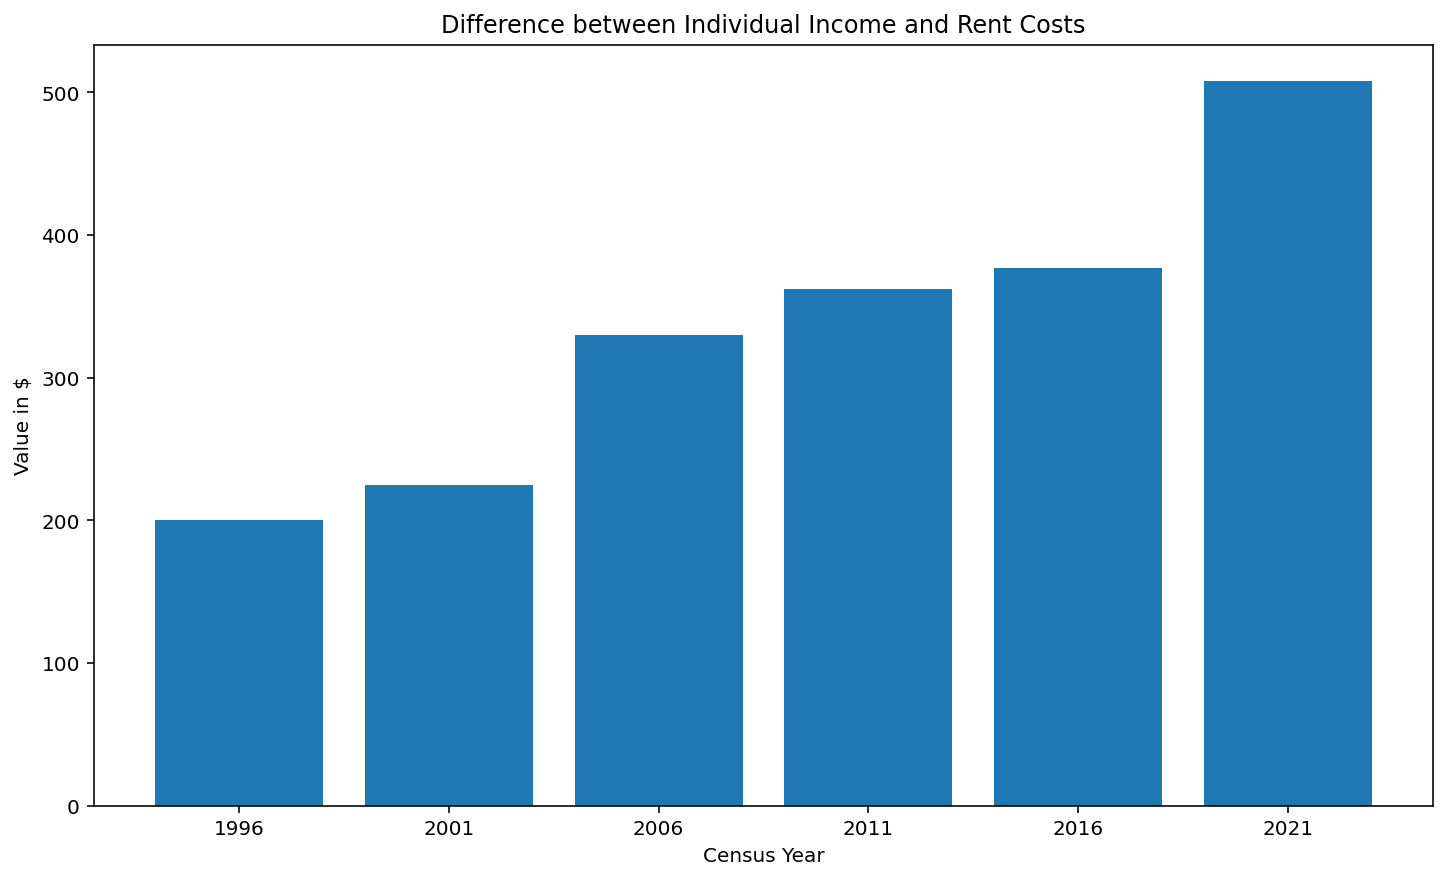

In [8]:
# Creating bar graph of differnce in income and rent
plt.bar(years,dif_income_rent)
plt.xlabel("Census Year")
plt.ylabel("Value in $")
plt.title("Difference between Individual Income and Rent Costs")
plt.show()

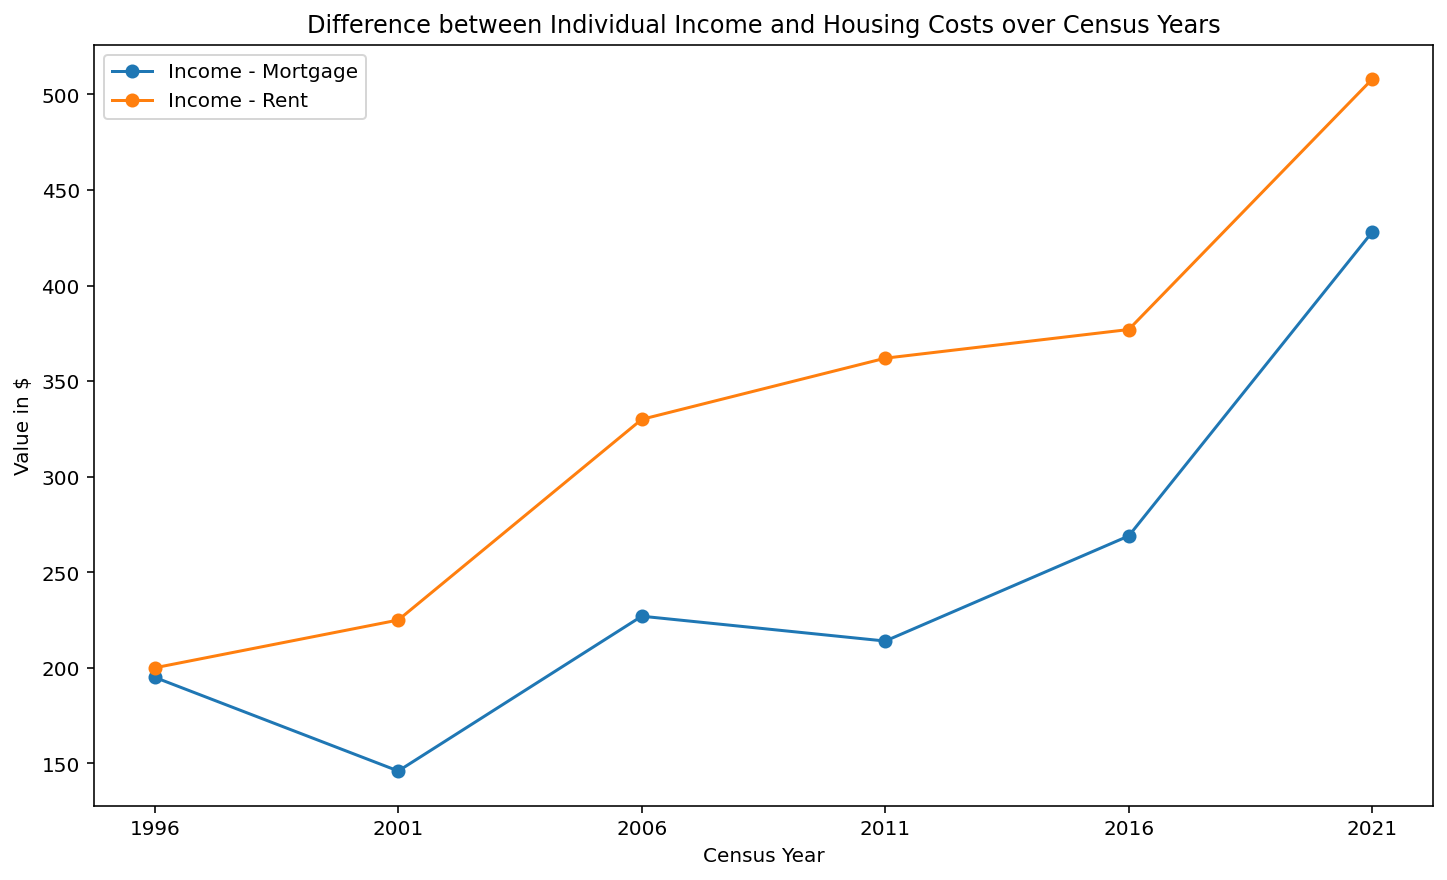

In [9]:
# Creating line graph of differnce in income and mortgage and income and rent
plt.plot(years,dif_income_mortgage, marker='o', label = 'Income - Mortgage')
plt.plot(years,dif_income_rent, marker='o', label = 'Income - Rent')
plt.xlabel("Census Year")
plt.ylabel("Value in $")
plt.title("Difference between Individual Income and Housing Costs over Census Years")
plt.legend()
plt.show()

**What do the above graphs tell us?**


The above bar and line graphs show the difference between an individuals income and mortgage/rent costs respectively. If the difference is greater then the easier it is for an individual to affort their home/rent. The line graph shows the difference is increasing meaning from 1996 till 2021 and therefor that housing affordability has increased. The bar graph show the same. Rent seems to be the hardest to afford in 1996 while mortgage it was 2001. It agrees with the conclusion I made earlier before I graphed the differences. It seems the difference is greatest in 2021 for both mortgage and rent, and therefor housing affordability is best in 2021.


### Conclusion

So does the data answer the question, has the median individual West Australian's income increased relative to housing affordability? The data suggests that, yes income has increased relative to housing affordability \(measured as mortgage cost and rent cost\). However, its likely not the whole picture, this data isn't completely up too date, the year is 2023 and this census covers only till 2021. We would need to measure data outside the census to get a better more realistic view on the 'housing crisis' everyone says we are in. It seems in 2021 we weren't that worse off, if the data is to be believed at face value then it suggests the opposite, we are better off. This data also doesn't account for the huge impacts that Covid19 has had on the economy, other events also aren't accounted for \(war in Ukraine\). More data point could be analyzed to provide a better and more accurate image of how we fair in terms of housing, homelessness could be provide an insight. But from what we have in this scope of data, it appears we are better off in 2021 then we were 25 years ago. 
